In [1]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import seaborn as sns 
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import datetime
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox


In [2]:
df1 = pd.read_csv('spotify30.csv', sep=',')


In [3]:
df1 = df1.tail(32833).copy()  

# Zamień kolumnę duration_ms na minuty
df1['duration_min'] = df1["duration_ms"].apply(lambda x: x/60000)

df1['track_artist'] = df1['track_artist'].str.replace('TiĂ«sto', 'Tiësto')


In [4]:
# Zastap NaN na 'unknown'
column = ['track_name', 'track_artist', 'track_album_name']
for i in column:
    df1[i] = df1[i].fillna('unknown')

In [5]:

df1['album_release_month'] = pd.DatetimeIndex(df1['track_album_release_date']).month
df1['album_release_year'] = pd.DatetimeIndex(df1['track_album_release_date']).year
df1['album_release_day'] = pd.DatetimeIndex(df1['track_album_release_date']).day

In [6]:
df1.drop(columns=['track_album_id', 'playlist_id', 'duration_ms', 'track_album_release_date'], inplace=True)

In [7]:
df1 = df1.drop_duplicates(subset='track_id')

# CZAS TRWANIA UTWORU

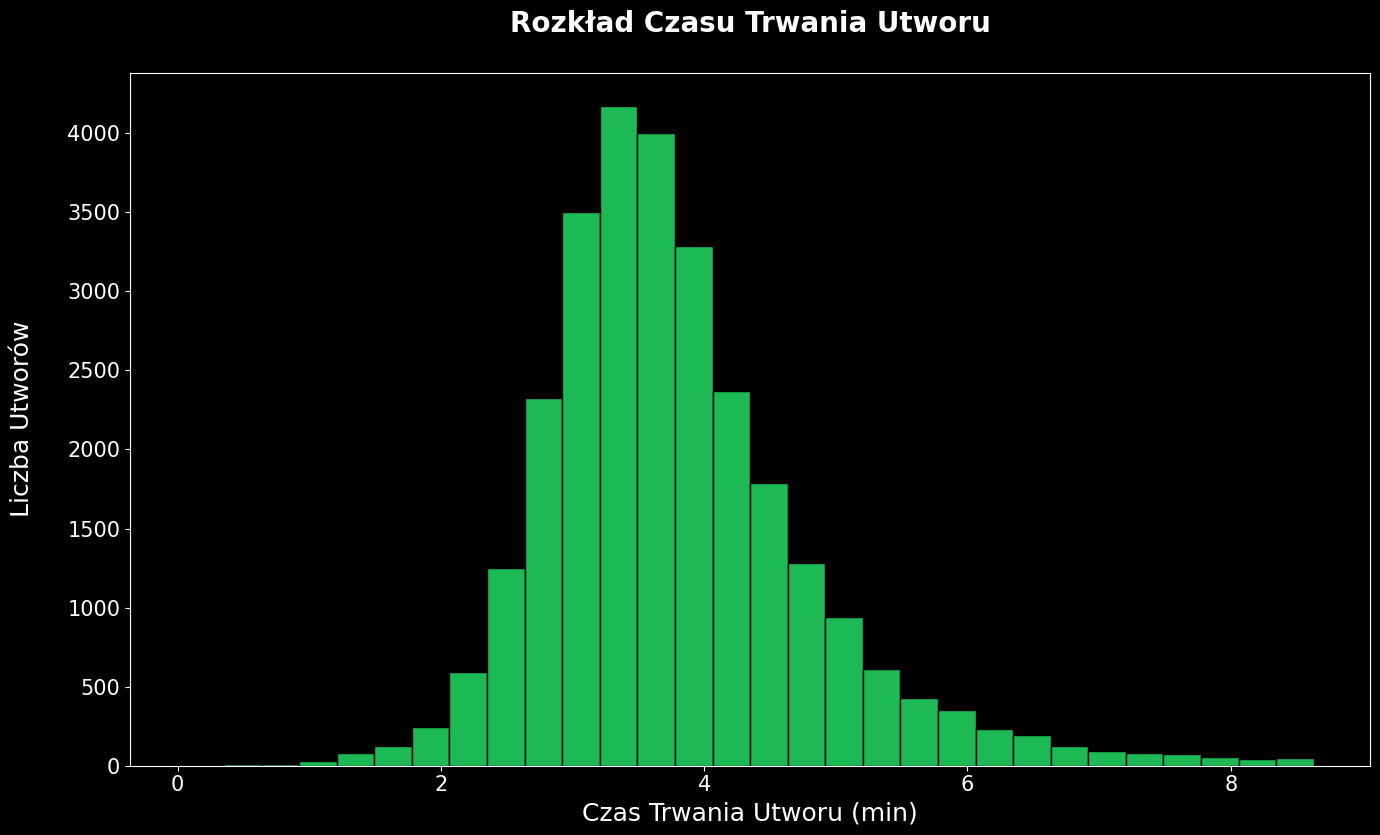

In [14]:
plt.figure(figsize=(16, 9))

plt.hist(df1['duration_min'], bins=30, color='#1DB954', edgecolor='black')


plt.title('Rozkład Czasu Trwania Utworu\n', size = 20, fontweight = 'bold')
plt.xlabel('Czas Trwania Utworu (min)', size =18)
plt.ylabel('Liczba Utworów\n', size = 18)



plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.style.use('dark_background')

plt.savefig('AUS_06.pdf')
plt.savefig('AUS_06.png')
plt.show()


In [9]:
#średnia długość utworu
srednia = df1['duration_min'].mean()

#odchylenie standardowe
odchylenie = df1['duration_min'].std()


ile = df1[(df1['duration_min'] > (srednia - odchylenie)) & (df1['duration_min'] < (srednia + odchylenie))]


#Jaki procent danych znajduje sie w odleglosci jednego odchylenia standardowego od sredniej 
ile_proc = len(ile)/len(df1['duration_min'])

print(srednia, len(df1['duration_min']),len(ile), ile_proc)

3.776266117106315 28356 21335 0.7523980815347722


# ROZKŁAD LICZBY UTWORÓW W DEKADACH

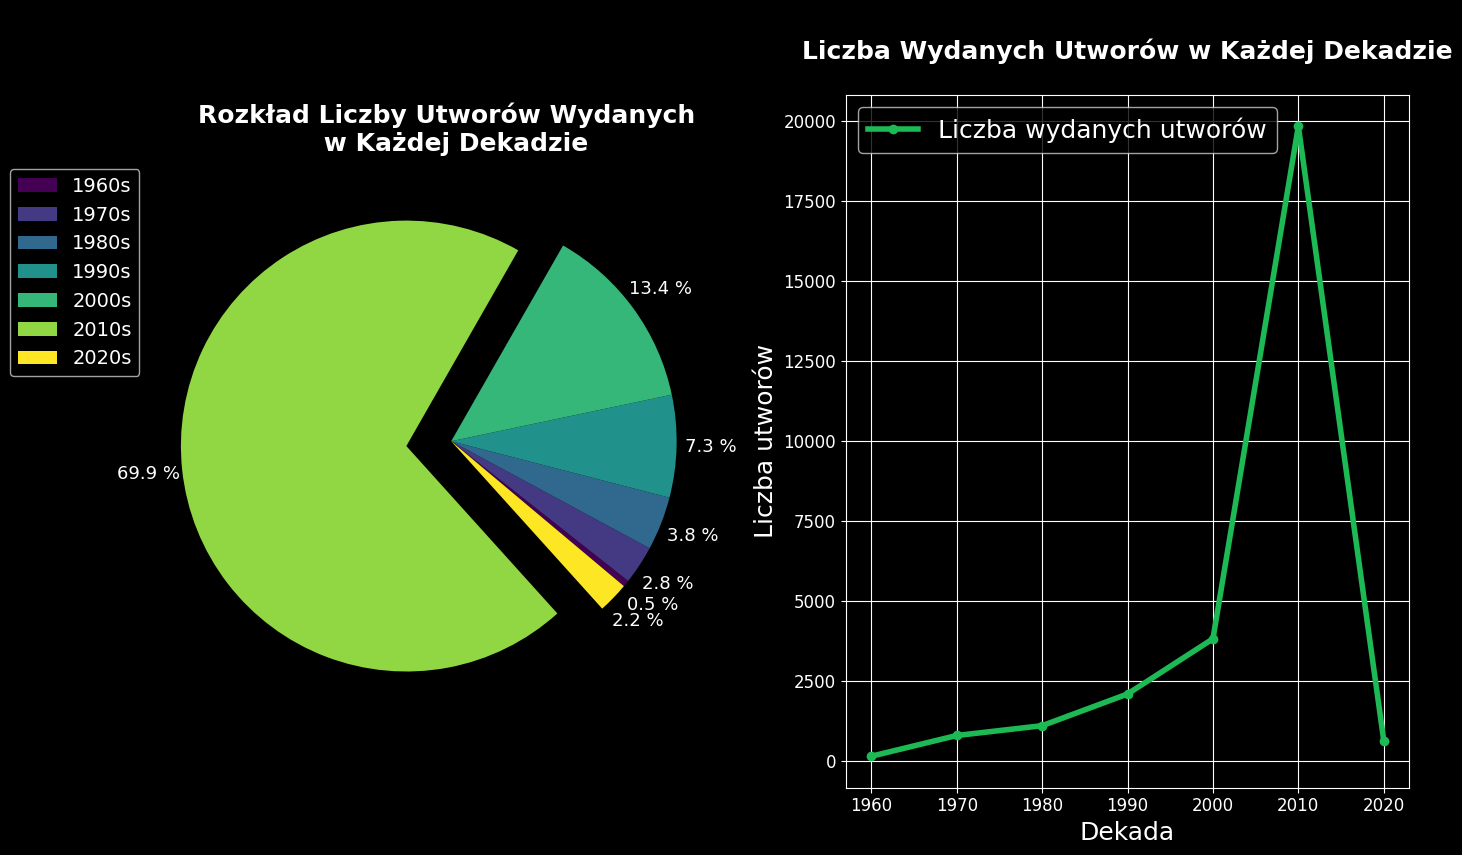

In [10]:
# wykres kolowy
plt.figure(figsize = (16, 9))
plt.subplot(1,2,1) 


decade_60s = df1.loc[(df1['album_release_year'] < 1970)].count()[0]
decade_70s = df1.loc[(df1['album_release_year'] >= 1970) & (df1['album_release_year'] < 1980)].count()[0]
decade_80s = df1.loc[(df1['album_release_year'] >= 1980) & (df1['album_release_year'] < 1990)].count()[0]
decade_90s = df1.loc[(df1['album_release_year'] >= 1990) & (df1['album_release_year'] < 2000)].count()[0]
decade_2k = df1.loc[(df1['album_release_year'] >= 2000) & (df1['album_release_year'] < 2010)].count()[0]
decade_2010s = df1.loc[(df1['album_release_year'] >= 2010) & (df1['album_release_year'] < 2020)].count()[0]
decade_2020s = df1.loc[(df1['album_release_year'] >= 2020)].count()[0]


 
decades = [decade_60s,decade_70s,decade_80s,decade_90s,decade_2k,decade_2010s,decade_2020s]
labels = ['1960s','1970s','1980s','1990s','2000s','2010s', '2020s']
explode = (0,0,0,0,0,0.2,0)

plt.title('Rozkład Liczby Utworów Wydanych \n w Każdej Dekadzie',fontsize = 18,fontweight = 'bold')

plt.pie(decades, labels=None, autopct='%1.1f %%', pctdistance=1.15,
        explode=explode, startangle=320, colors=plt.cm.viridis(np.linspace(0, 1, len(decades))),
        textprops={'fontsize': 13})

# legenda
plt.subplot(1,2,1)
legend_labels = ['1960s','1970s','1980s','1990s','2000s','2010s', '2020s']
plt.legend(labels=legend_labels, loc='upper left', bbox_to_anchor=(-0.3, 1.0), fontsize=14)

#wykres liniowy
plt.subplot(1,2,2) 

xticks = [1960,1970,1980,1990,2000,2010,2020]
ydecades = [decade_60s,decade_70s,decade_80s,decade_90s,decade_2k,decade_2010s,decade_2020s]

plt.plot(xticks,ydecades,marker = 'o',linestyle = '-',linewidth=4,color = '#1DB954',label = 'Liczba wydanych utworów')
plt.title('\nLiczba Wydanych Utworów w Każdej Dekadzie\n', fontsize = 18, fontweight = 'bold')
plt.legend(loc='upper left', fontsize = 18)

plt.xlabel('Dekada', fontsize = 18)
plt.ylabel('Liczba utworów', fontsize = 18)



plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

plt.grid(True)
plt.style.use('dark_background')

plt.savefig('AUS_07.pdf')
plt.savefig('AUS_07.png')

plt.show()

# POPULARNOŚĆ WYBRANYCH ARTYSTÓW NA PRZESTRZENI LAT

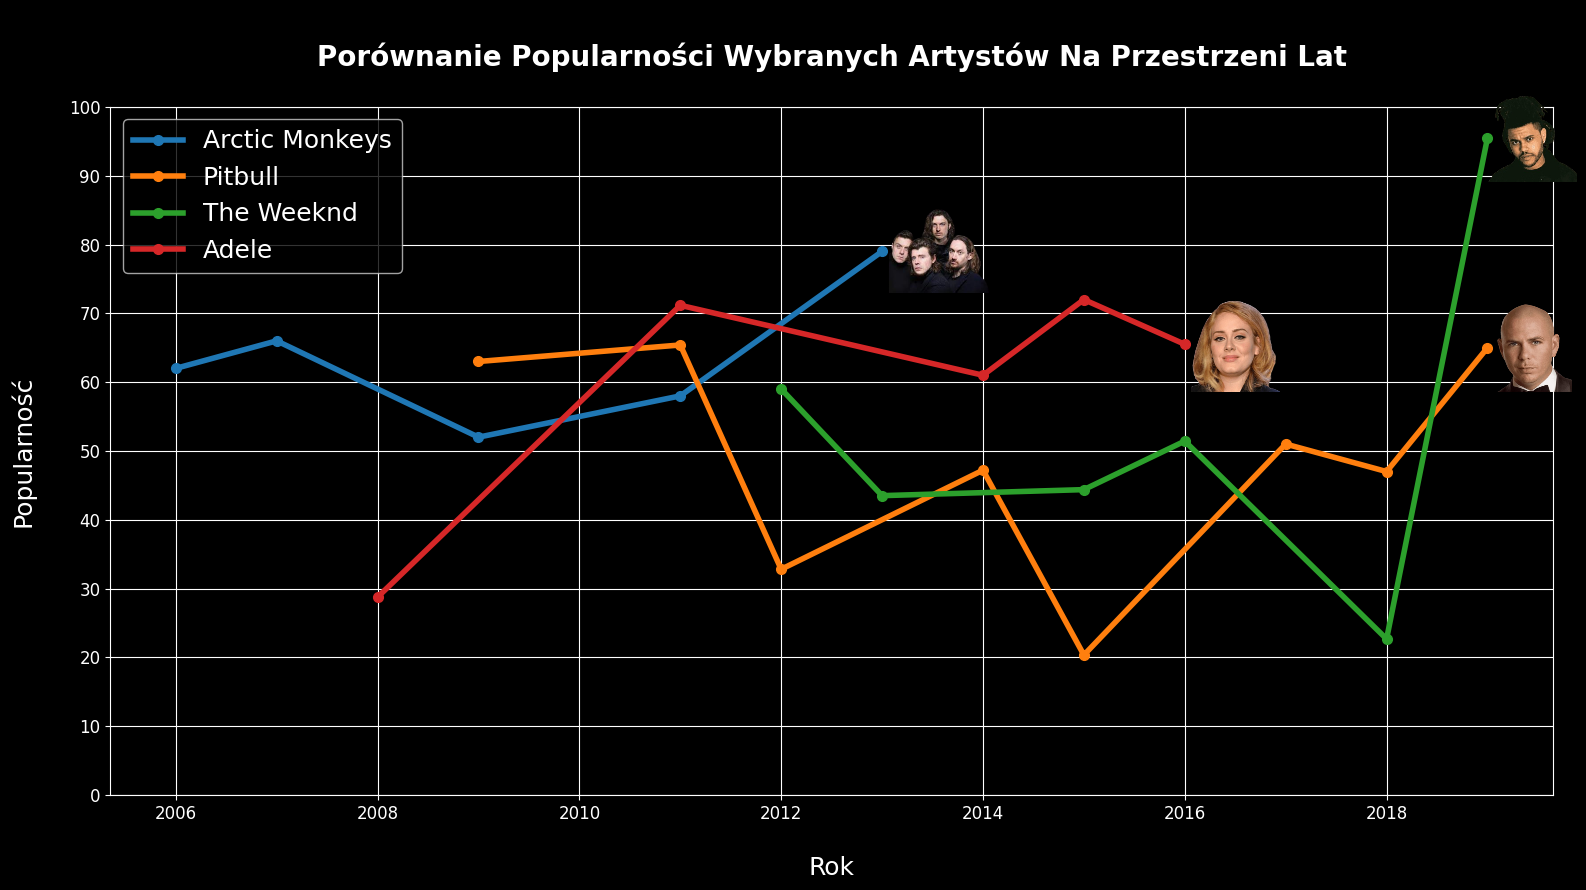

In [11]:
Arctic_Monkeys_popularity_by_year = df1[df1['track_artist'] == 'Arctic Monkeys'].groupby(df1.album_release_year)['track_popularity'].mean()

Pitbull_popularity_by_year = df1[df1['track_artist'] == 'Pitbull'].groupby(df1.album_release_year)['track_popularity'].mean()

weeknd_popularity_by_year = df1[df1['track_artist'] == 'The Weeknd'].groupby(df1.album_release_year)['track_popularity'].mean()

Adele_popularity_by_year = df1[df1['track_artist'] == 'Adele'].groupby(df1.album_release_year)['track_popularity'].mean()

artists = ['Arctic Monkeys', 'Pitbull', 'The Weeknd', 'Adele']
popularity_data = [Arctic_Monkeys_popularity_by_year, Pitbull_popularity_by_year, weeknd_popularity_by_year, Adele_popularity_by_year]


img_path = {'Arctic Monkeys': 'ArcticMonkeys.png',
            'Pitbull': 'Pitbull.png',
            'The Weeknd': 'TheWeeknd.png',
            'Adele': 'Adele.png'}


fig, ax = plt.subplots(figsize=(16, 9))

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

for artist, data, color in zip(artists, popularity_data, colors):
    ax.plot(data.index, data, marker='o', markersize=7, label=artist, color=color, linewidth=4)

    
    img = mpimg.imread(img_path[artist])
    imagebox = OffsetImage(img, zoom=0.2)  
    if artist == 'Adele' or artist == 'Arctic Monkeys':
        ab = AnnotationBbox(imagebox, (data.index[-1]+0.5, data.iloc[-1]), frameon=False, pad=0.0)
    else: 
        ab = AnnotationBbox(imagebox, (data.index[-1]+0.4, data.iloc[-1]), frameon=False, pad=0.0)
    ax.add_artist(ab)


ax.set_title('\nPorównanie Popularności Wybranych Artystów Na Przestrzeni Lat\n', fontsize=20, fontweight = 'bold')
ax.set_xlabel('\nRok', fontsize=18)
ax.set_ylabel('Popularność\n', fontsize=18)
ax.yaxis.set_ticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
ax.tick_params(axis='both', labelsize=12)
ax.grid(True)
ax.legend(loc=2, fontsize=18)


plt.savefig('AUS_08.pdf')
plt.savefig('AUS_08.png')

plt.tight_layout()


plt.show()


# ZMIANA PARAMETRÓW NA PRZESTRZENI LAT

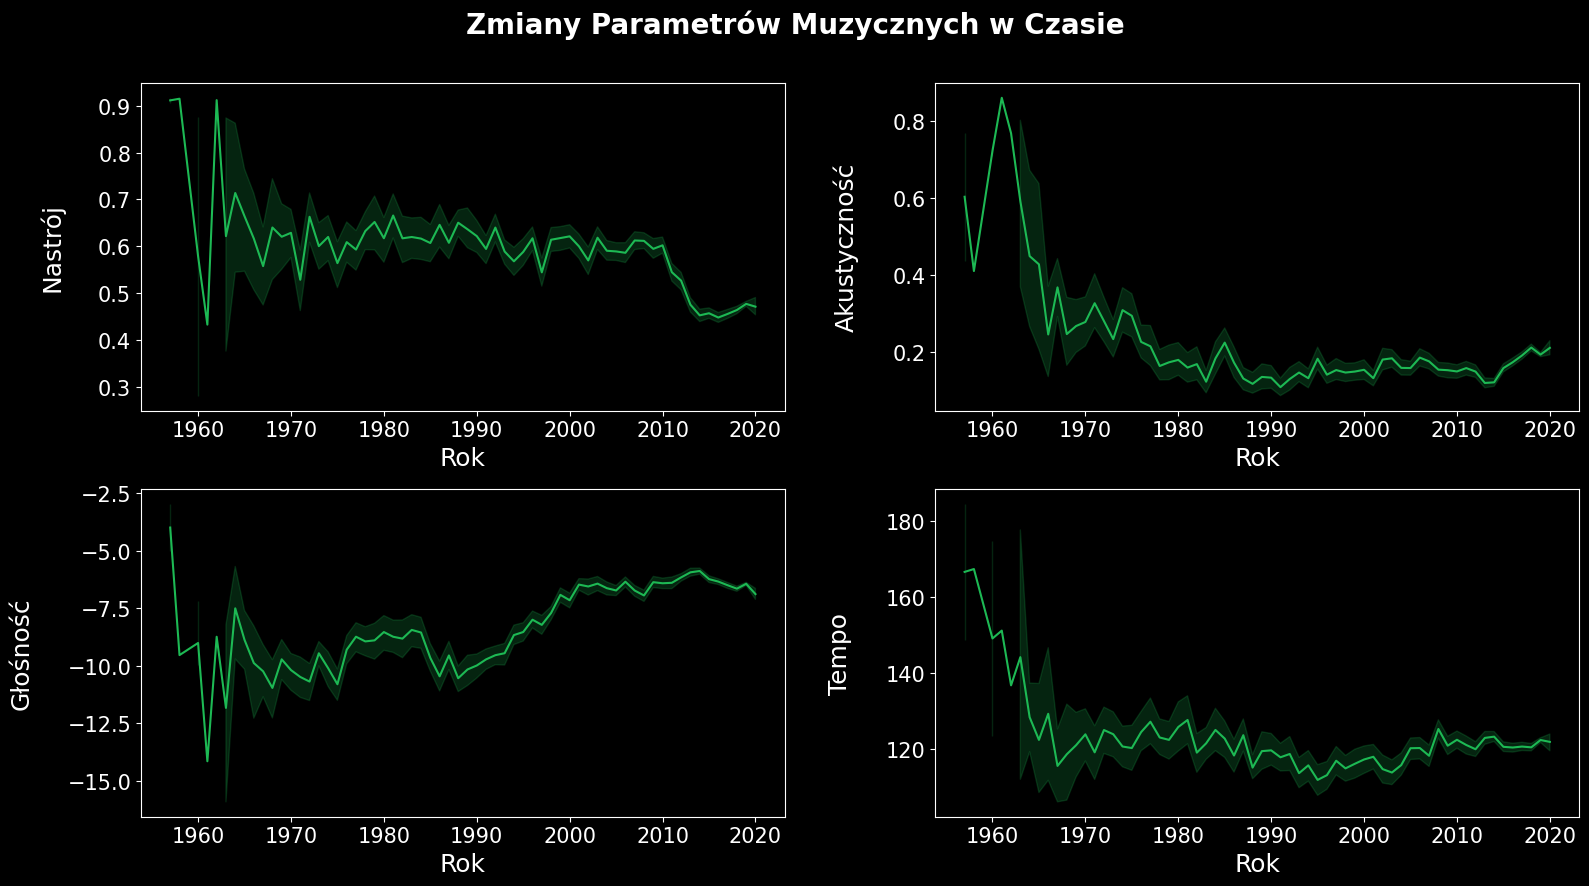

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(16, 9))


sns.lineplot(data=df1, x=df1.album_release_year, y="valence", ax=axes[0, 0], color='#1DB954')
axes[0, 0].set_xlabel('Rok', fontsize=18)
axes[0, 0].set_ylabel('Nastrój\n', fontsize=18)
axes[0, 0].tick_params(axis='both', labelsize=15)

sns.lineplot(data=df1, x=df1.album_release_year, y="loudness", ax=axes[1, 0], color='#1DB954')
axes[1, 0].set_xlabel('Rok', fontsize=18)
axes[1, 0].set_ylabel('Głośność\n', fontsize=18)
axes[1, 0].tick_params(axis='both', labelsize=15)

sns.lineplot(data=df1, x=df1.album_release_year, y="acousticness", ax=axes[0, 1], color='#1DB954')
axes[0, 1].set_xlabel('Rok', fontsize=18)
axes[0, 1].set_ylabel('\nAkustyczność\n', fontsize=18)
axes[0, 1].tick_params(axis='both', labelsize=15)

sns.lineplot(data=df1, x=df1.album_release_year, y="tempo", ax=axes[1, 1], color='#1DB954')
axes[1, 1].set_xlabel('Rok', fontsize=18)
axes[1, 1].set_ylabel('\nTempo\n', fontsize=18)
axes[1, 1].tick_params(axis='both', labelsize=15)

fig.suptitle('Zmiany Parametrów Muzycznych w Czasie\n', fontsize=20, color='white', fontweight='bold')
plt.style.use('dark_background')
plt.tight_layout()
plt.savefig('AUS_10.pdf')
plt.savefig('AUS_10.png')

plt.show()

# ROZKŁAD POPULARNOŚCI UTWORÓW

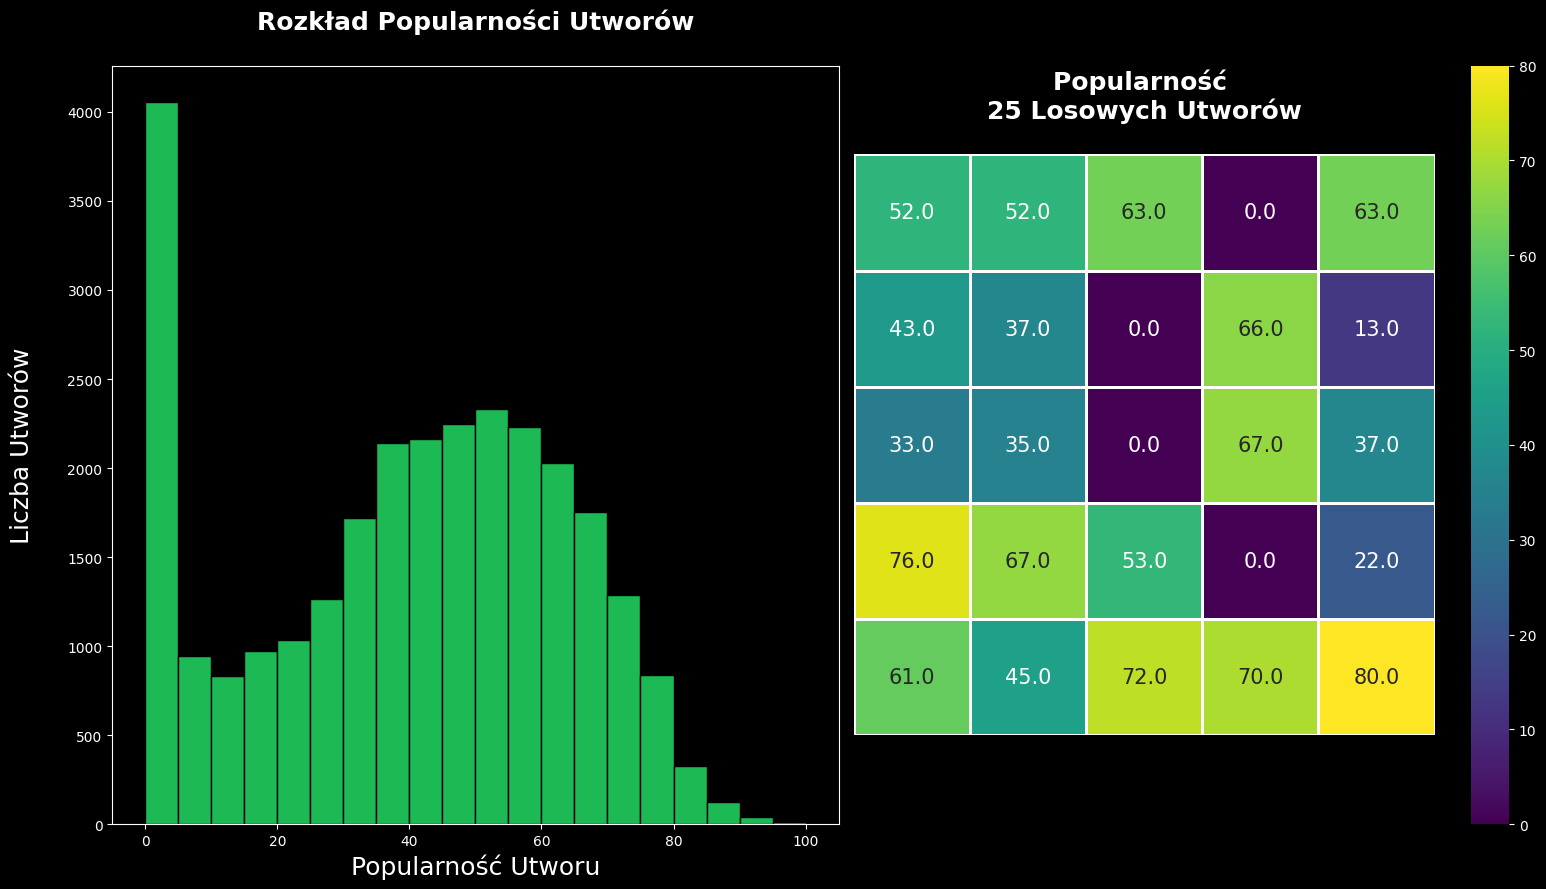

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 9))

# Wykres histogramu
ax1.hist(df1['track_popularity'], bins=20, color='#1DB954', edgecolor='black')
ax1.set_title('Rozkład Popularności Utworów\n',fontsize = 18,fontweight = 'bold')
ax1.set_xlabel('Popularność Utworu',fontsize = 18)
ax1.set_ylabel('Liczba Utworów\n',fontsize = 18)

# Wykres heatmapy
random_tracks = df1.sample(n=25, random_state=15)
heatmap_data = random_tracks[['track_name', 'track_popularity']].set_index('track_name')
heatmap_matrix = heatmap_data['track_popularity'].values.reshape((5, 5))

sns.heatmap(heatmap_matrix, cmap='viridis', annot=True, fmt=".1f", linewidths=.8, ax=ax2, cbar=True, square=True, annot_kws={"size": 15})
ax2.set_title('Popularność \n25 Losowych Utworów\n',fontsize = 18, fontweight = 'bold')


ax2.set_xticks([])  
ax2.set_yticks([])  

plt.tight_layout()
plt.style.use('dark_background')


plt.savefig('AUS_11.pdf')
plt.savefig('AUS_11.png')
plt.show()

In [15]:
df1['track_popularity'].mean()

39.329771476936095